In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import cv2
from skimage import io
from tqdm import tqdm
tqdm.pandas()

In [4]:
df = pd.read_csv("./fashionProducts.csv")
print(f"Total Products: {df.shape[0]}")
df.head()

Total Products: 10815


,product_id,product_url,image_url,description,brand,gender,category,type
0,mtf_0000000001,https://www.myntra.com/blazers/invictus/invict...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",INVICTUS Brown Slim Fit Single-Breasted Formal...,INVICTUS,men,topwear,formal
1,mtf_0000000002,https://www.myntra.com/blazers/raymond/raymond...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Raymond Men Dark Blue Slim Fit Solid Single-Br...,Raymond,men,topwear,formal
2,mtf_0000000003,https://www.myntra.com/blazers/hangup-trend/ha...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",hangup trend Men Black Solid Bandhgala Formal ...,hangup,men,topwear,formal
3,mtf_0000000004,https://www.myntra.com/blazers/arrow/arrow-men...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Arrow Men Olive Green Solid Slim-Fit Single-Br...,Arrow,men,topwear,formal
4,mtf_0000000005,https://www.myntra.com/blazers/raymond/raymond...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Raymond Men Checked Single Breasted Blazer,Raymond,men,topwear,formal


In [5]:
df.isnull().sum()

product_id     0
product_url    0
image_url      0
description    0
brand          0
gender         0
category       0
type           0
dtype: int64

In [6]:
df.product_id.duplicated().sum()

0

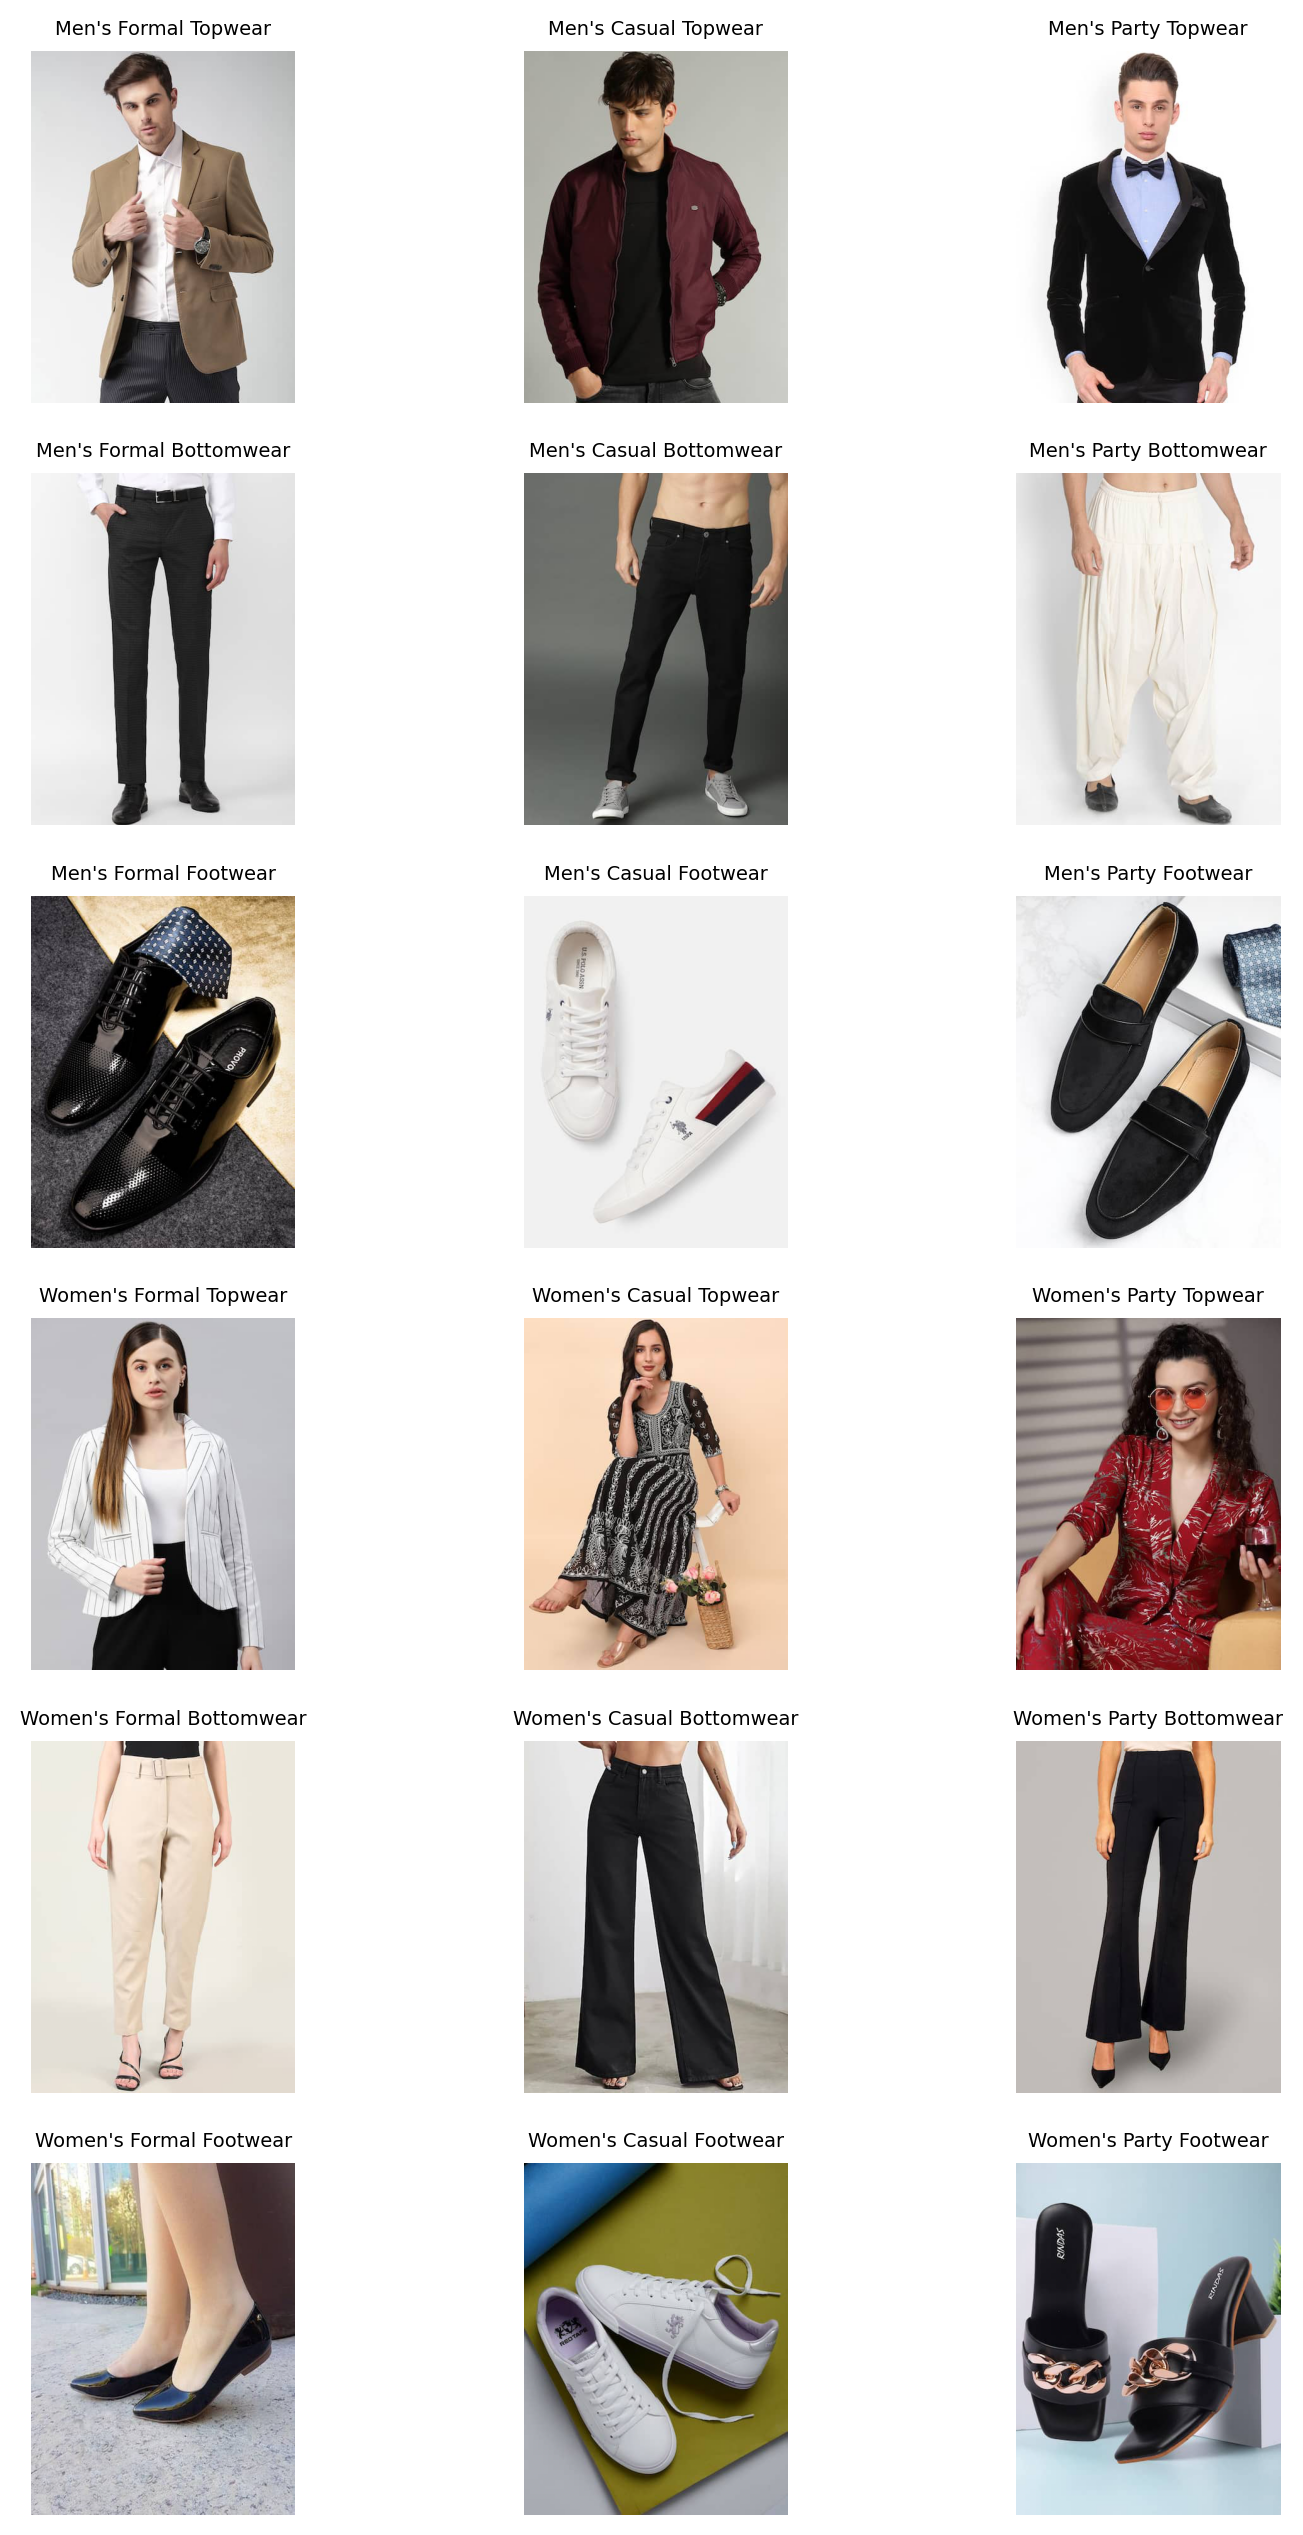

In [7]:
genders = list(df.gender.unique())
categories = list(df.category.unique())
occasions = list(df.type.unique()) 

plt.figure(figsize=(9,16), dpi=200)
i = 1
for gender in genders:
    for category in categories:
        for occasion in occasions:
            mdf = df[(df.gender == gender) & (df.category == category) & (df.type == occasion)]
            img_url = mdf.image_url.iloc[0]
            plt.subplot(6,3,i)
            plt.imshow(io.imread(img_url))
            plt.axis("off")
            plt.title(f"{gender}s {occasion} {category}".title().replace("ns", "n's"), fontsize=7)
            i += 1

In [8]:
df.gender.value_counts()

men      5436
women    5379
Name: gender, dtype: int64

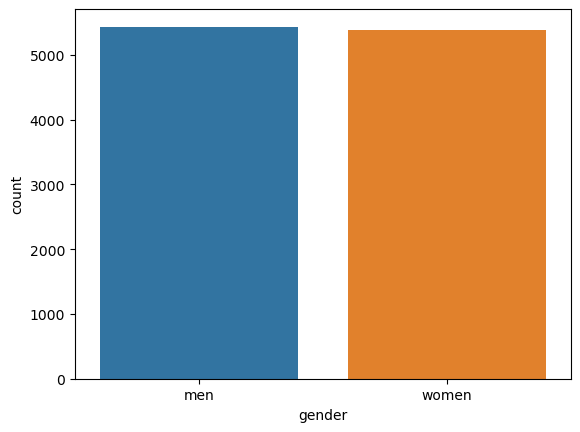

In [9]:
sns.countplot(df.gender)
plt.show()

In [10]:
df.category.value_counts()

footwear      3780
topwear       3674
bottomwear    3361
Name: category, dtype: int64

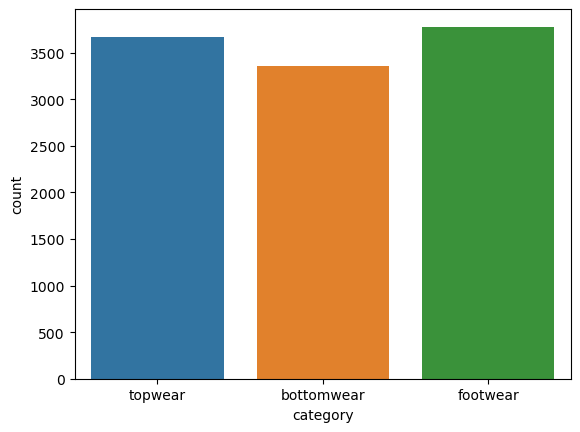

In [11]:
sns.countplot(df.category)
plt.show()